# Loan Application Status Prediction

Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. Here "Loan_Status" is our target variable.

We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. Hence this problem statement tell us that the target has two classes Yes and No so it is a "Classification problem".

In [1]:
#importing the necessary libraries

#Linear algebra
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#data preprocessing
import pandas as pd

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

#algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import joblib

# Loading the Dataset

In [2]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Remarks: We can see that there are 614 rows and 13 columns in our dataset. In our problem statement we are asked to predict the 'loan status' which is the target label and the remaining columns are our features making this a Classification problem.

In [3]:
#checking dimension of dataset

df.shape


(614, 13)

# Data Exploration/Analysis

In [4]:
#checking top 5 rows 

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#checking top 5 rows 

df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
#checking sample

df.sample(2)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
490,LP002560,Male,No,0,Not Graduate,No,2699,2785.0,96.0,360.0,NaN,Semiurban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


In [7]:
#checking column names

df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
#checking information of datatype

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Remarks: We see that there are 4 columns with float datatype, 1 column with integer datatype and 8 columns with object data type.

In [9]:
#checking for null values

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Many missing values are presnt.

For missing values in categorical columns, we will fill them with mode; and for continuous columns we will fill them with mean.


<AxesSubplot:>

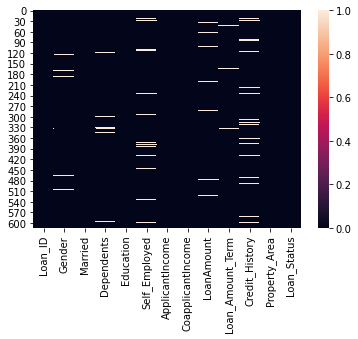

In [10]:
#heatmap for null values

sns.heatmap(df.isnull())

white lines showing the null values

In [11]:
#checking unique values

df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

we can see No. of unique values in each columns.

In [12]:
#checking the value counts for each column

for i in  df.columns:
    print(df[i].value_counts())
    print('/n')

LP002161    1
LP002571    1
LP001385    1
LP001562    1
LP002390    1
           ..
LP002205    1
LP001692    1
LP001894    1
LP002308    1
LP002055    1
Name: Loan_ID, Length: 614, dtype: int64
/n
Male      489
Female    112
Name: Gender, dtype: int64
/n
Yes    398
No     213
Name: Married, dtype: int64
/n
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
/n
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
/n
No     500
Yes     82
Name: Self_Employed, dtype: int64
/n
2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64
/n
0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
2365.0      1
1695.0      1
2466.0      1
2375.0      1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
/n
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0   

These are the list of value counts present in each column.


The column Loan_ID is the unique ID given to the applicants also it has no significance in the prediction. So lets drop this column.

In [13]:
#Removing irrelevant column

df.drop('Loan_ID',axis=1,inplace=True)

# Treating null values

In [14]:
#Filling the missing values in categorical columns with mode and numerical column with median

df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [15]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Remarks: In th above cell, we can see that there are no null values present in the dataset now.


<AxesSubplot:>

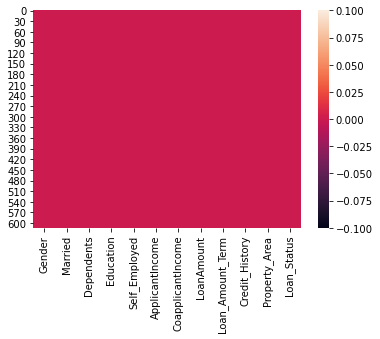

In [16]:
#heatmap for null values

sns.heatmap(df.isnull())

NO null values presnt after filling 

# Statistical Analysis


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


Remarks:

count for all the columns are same, so, no data is missing.

mean is greater than median in ApplicantIncome, so data might be right skewed.

std is higher in ApplicantIncome and CoapplicantIncome, so, data might be spreaded.

Large difference between 75th percentile and max is present in ApplicantIncome and CoapplicantIncome. There might be some outliers.

# Exploratory Data Analysis(EDA)


# Univariate Analysis:

Y    422
N    192
Name: Loan_Status, dtype: int64


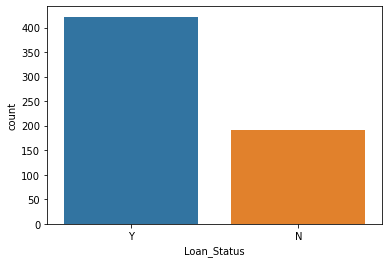

In [18]:
#visualizing the loan approvala status

print(df['Loan_Status'].value_counts())
sns.countplot(df['Loan_Status'])
plt.show()

The count of "Y" is maximum caompare to "N" that means total 422 applicants get their loan and only 192 applicants gets denied.

We can also notice the imbalance of the class, and it needs to get balance using over_sampling method to increase the instances of minority class.

Male      502
Female    112
Name: Gender, dtype: int64


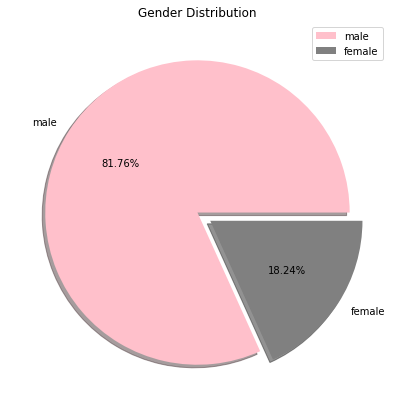

In [19]:
#checking Gender with pie chart


print(df['Gender'].value_counts())
labels='male','female'
fig,ax=plt.subplots(figsize=(18,7))
explode = [0, 0.1]
colors=['pink','gray']
ax.pie(df['Gender'].value_counts(),explode=explode,labels=labels,autopct='%1.2f%%',shadow=True,colors=colors)
plt.title('Gender Distribution')
plt.legend(prop={'size':10})
plt.show()

Remarks: In the above pie chart, we can see that the number of males cover 81.76% of the rows in Gender column while females cover only 18.24% of rows.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


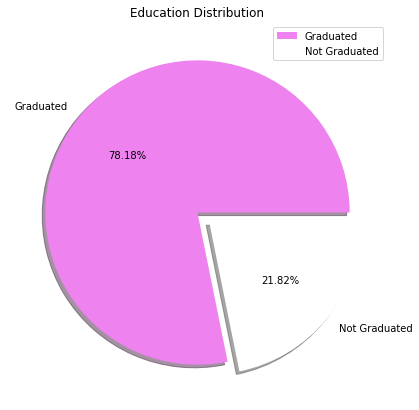

In [20]:
#checking Education with pie chart


print(df['Education'].value_counts())
labels='Graduated','Not Graduated',
fig,ax=plt.subplots(figsize=(18,7))
explode = [0, 0.1]
colors=['violet','white']
ax.pie(df['Education'].value_counts(),explode=explode,labels=labels,autopct='%1.2f%%',shadow=True,colors=colors)
plt.title('Education Distribution')
plt.legend(prop={'size':10})
plt.show()

Remarks: we can see that 78.18% of rows present in Education column are filled with graduates while the remaining 21.82% rows are filled with under graduate people.



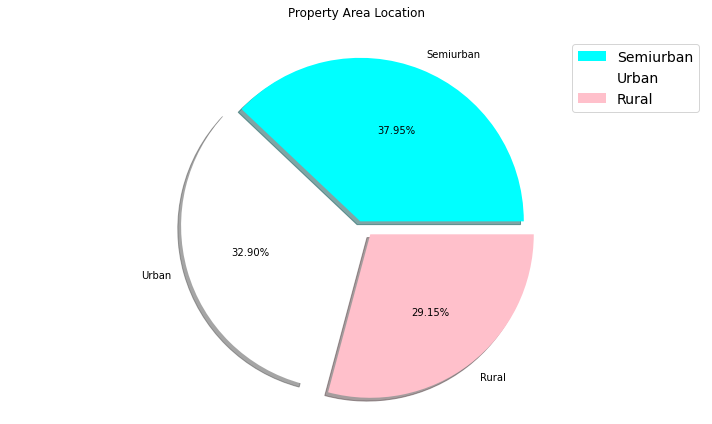

In [21]:
#checking Property_Area with pie chart
plt.figure(figsize=(10,6))
explode = [0, 0.1,0.1]
colors=['cyan','white','pink']
plt.pie(df['Property_Area'].value_counts(), labels=df['Property_Area'].value_counts().index, 
        colors=colors,explode=explode,shadow=True, autopct='%1.2f%%')
plt.title('Property Area Location\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

Remarks: we see from the plot above that 37.95% rows are covered by semi urban area type, 32.90% rows are covered by urban area type and 29.15% rows are covered by rural area type.

<Figure size 1296x504 with 0 Axes>

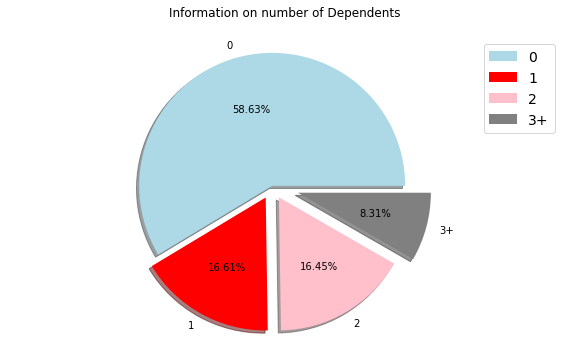

In [22]:
plt.figure(figsize=(18,7))
explode = [0, 0.1,0.1,0.2,]
colors=['lightblue','red','pink','gray']
plt.figure(figsize=(8,5))
plt.pie(df['Dependents'].value_counts(), labels=df['Dependents'].value_counts().index, 
        shadow=True,explode=explode,colors=colors,autopct='%1.2f%%')
plt.title('Information on number of Dependents\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

Remarks: It shows the total number of dependants where 56.63% rows are covered with people having 0 dependents, 16.61% rows covered with people having 1 dependent, 16.45% rows covered with people having 2 dependents and 8.31% rows covered with people having 3 or more dependents.

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


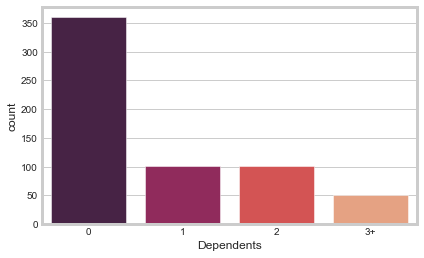

In [179]:
#visualizing the countplot of Dependents 

print(df['Dependents'].value_counts())
sns.countplot(df['Dependents'],palette='rocket')
plt.show()

The applicants who have 0 dependents have high counts and the applicants having more than 3 dependents counts are very less.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


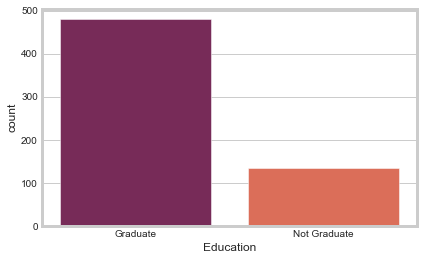

In [180]:
#visualizing the countplot for Education 

print(df['Education'].value_counts())
sns.countplot(df['Education'],palette='rocket')
plt.show()

The count of Graduate applicants is high in counts means the maximum number of Graduated applicants are applying for the loan.

Yes    401
No     213
Name: Married, dtype: int64


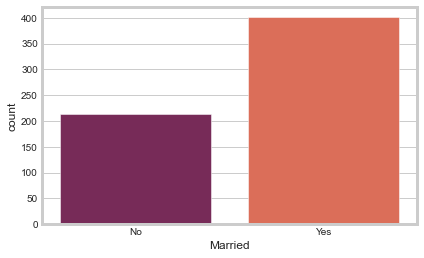

In [181]:
# Visualizing the count of marital status of the applicants

print(df['Married'].value_counts())
sns.countplot(df['Married'],palette='rocket')
plt.show()

yes are more than No

No     532
Yes     82
Name: Self_Employed, dtype: int64


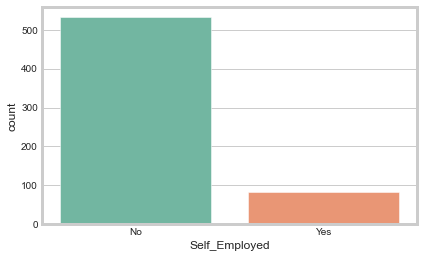

In [182]:
#visualizing the  Self_Employed

print(df['Self_Employed'].value_counts())
sns.countplot(df['Self_Employed'],palette='Set2')
plt.show()

Most of the applicants or not self employed that means they might working in the public sectors and only 82 applicants are self employed and running their own bussiness.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


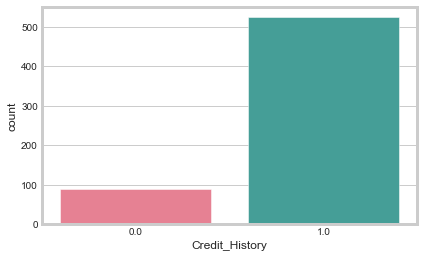

In [183]:
# Visualizing the count of Credit_History
 
print(df['Credit_History'].value_counts())
sns.countplot(df['Credit_History'],palette='husl')
plt.show()

Most of the applicants who have credit history 1 are high in numbers.

# Distribution of Skewness

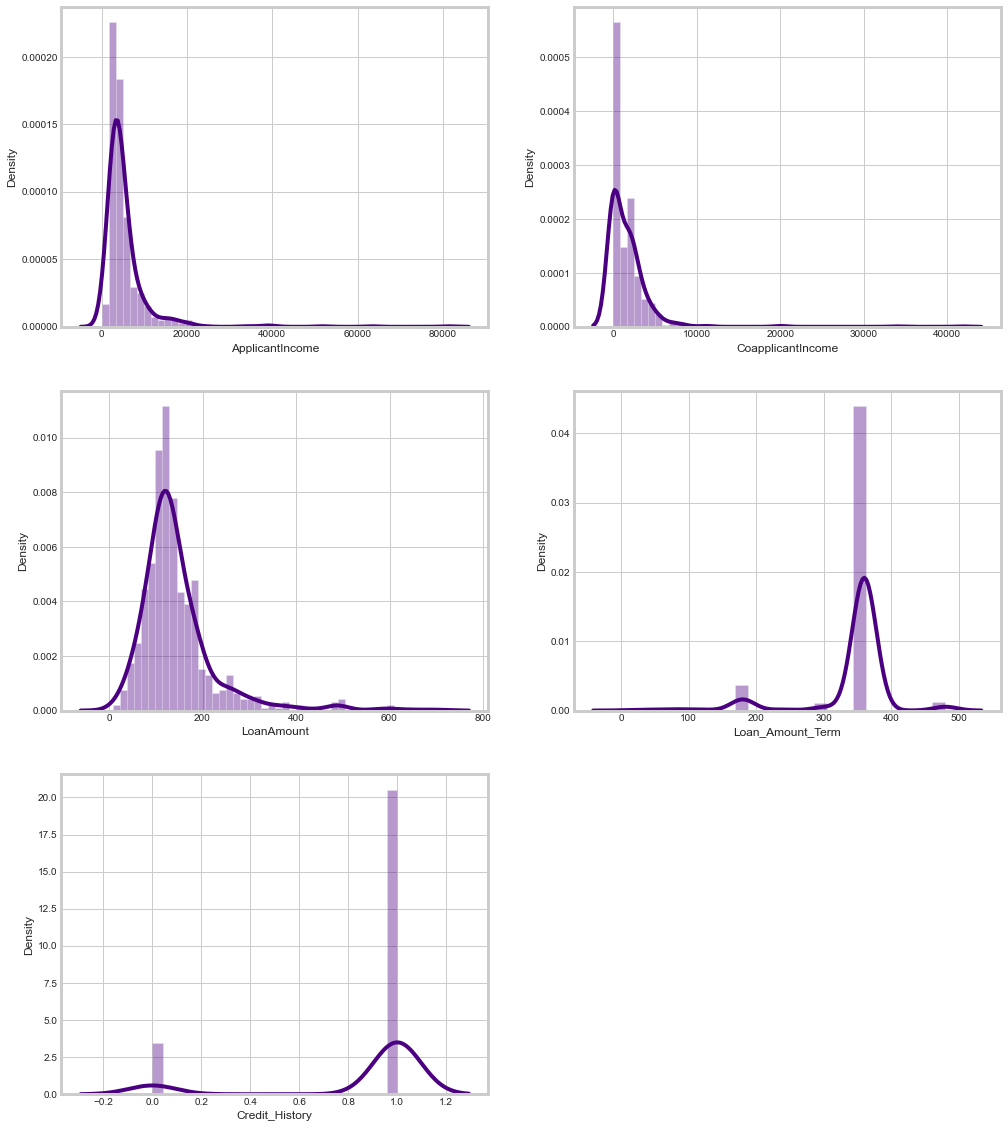

In [184]:
#checking the distribution plot 

plt.figure(figsize=(15,20))
col=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for i in range(len(col)):
    sns.set_style("whitegrid")
    plt.subplot(3,2,i+1)
    sns.distplot(df[col[i]],color='indigo')


Observation: From the above distplot, we can see that data has some skewness.

# Bivariate Analysis:

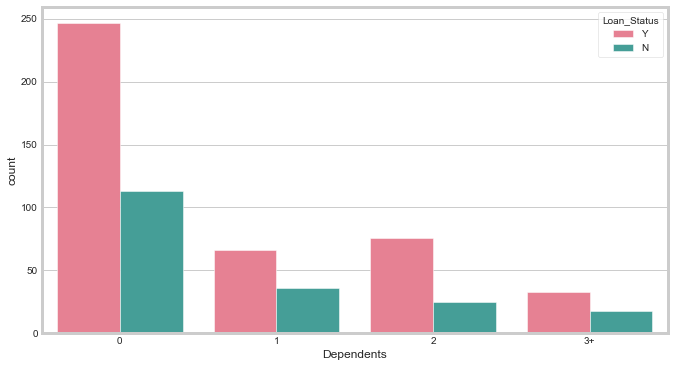

In [185]:
#Visualizing count of Dependents of the applicants on the basis of loan status

plt.figure(figsize=(10,6))
sns.countplot(df['Dependents'],hue=df['Loan_Status'],palette='husl')
plt.show()

The count of 0 dependents is high which means most of the applicants have no dependents. Having dependents means having commitments. The 3+ dependents means more than 3 applicants have dependents.

The applicants who have dependents 0 are more likely to get their loan approved.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


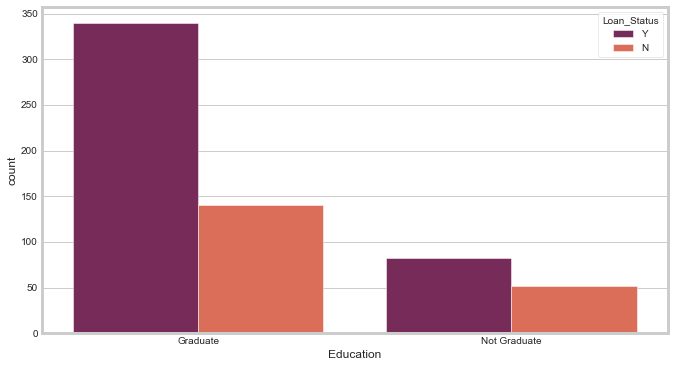

In [186]:
#Visualizing count of Education of the applicants

plt.figure(figsize=(10,6))
print(df['Education'].value_counts())
sns.countplot(df['Education'],hue=df['Loan_Status'],palette='rocket')
plt.show()

Most of the applicants who have applied for loan are graduated and only few are not graduated

No     532
Yes     82
Name: Self_Employed, dtype: int64


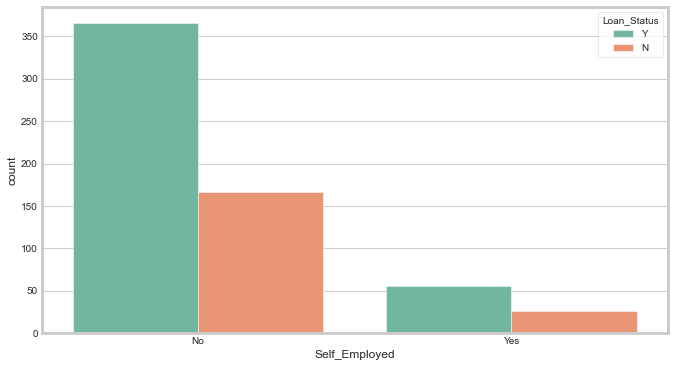

In [187]:
#Visualizing count of Self_Employed of the applicants

plt.figure(figsize=(10,6))
print(df['Self_Employed'].value_counts())
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'],palette='Set2')
plt.show()

Most of the applicants are not Self_Employed means they are working in public sectors and only few of the applicants are self_employed.

The applicants who are not self_employed have the tendency of getting thier loans than self employed applicants.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


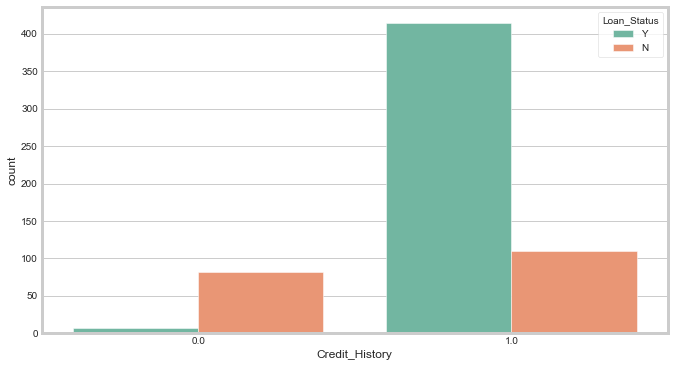

In [188]:
#Visualizing count of Credit_History of the applicants

plt.figure(figsize=(10,6))
print(df['Credit_History'].value_counts())
sns.countplot(df['Credit_History'],hue=df['Loan_Status'],palette='Set2')
plt.show()

The credit_history gives the information of the applicants who took loan in the past have cleared or not. Here we can notice the applicants who have credit history 1 have high counts which means most of the loan applicants have cleared their past loans and only few of them have to clear it

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


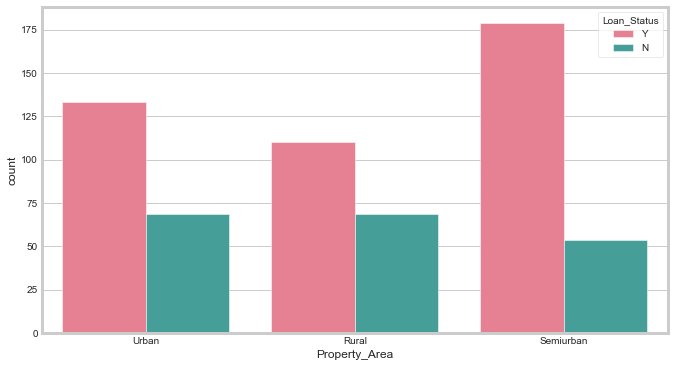

In [189]:
#Visualizing count of Property_Area of the applicants

plt.figure(figsize=(10,6))
print(df['Property_Area'].value_counts())
sns.countplot(df['Property_Area'],hue=df['Loan_Status'],palette='husl')
plt.show()

Most of the applicants from the Semiurban have applied for loan followed by Urban area. Also they have more chances of getting their loan approval.

Male      502
Female    112
Name: Gender, dtype: int64


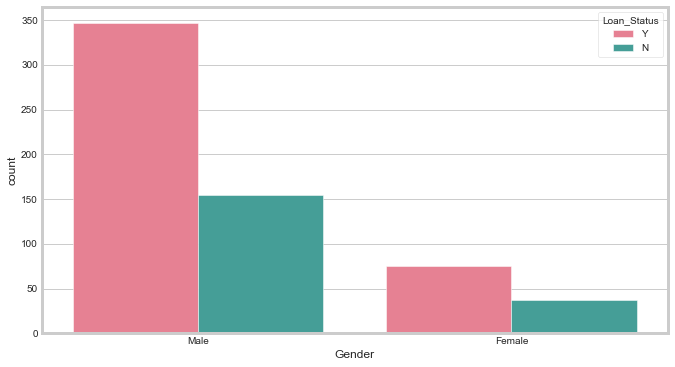

In [190]:
#Visualizing count of Gender of the applicants

plt.figure(figsize=(10,6))
print(df['Gender'].value_counts())
sns.countplot(df['Gender'],hue=df['Loan_Status'],palette='husl')
plt.show()

The male applicants are more than female applicant

Yes    401
No     213
Name: Married, dtype: int64


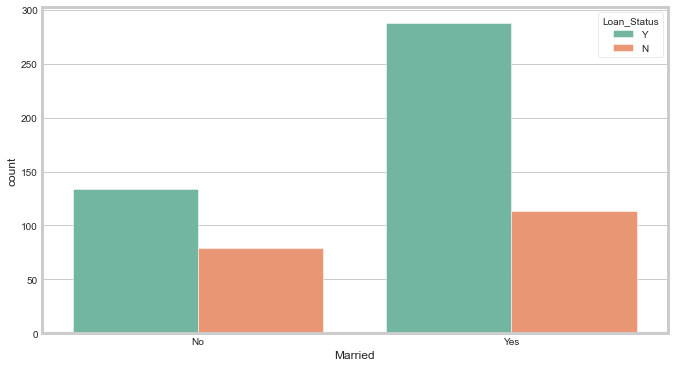

In [191]:
#Visualizing count of Married of the applicants

plt.figure(figsize=(10,6))
print(df['Married'].value_counts())
sns.countplot(df['Married'],hue=df['Loan_Status'],palette='Set2')
plt.show()

The married applicants are more than unmarried applicants.



<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

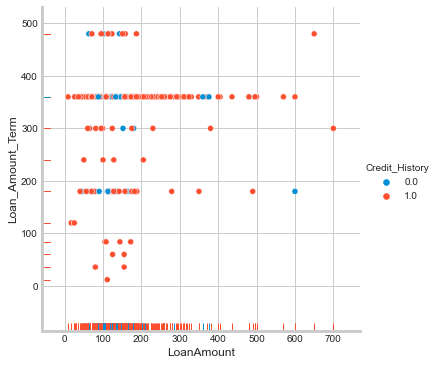

In [193]:

sns.relplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Credit_History', legend=False)

Remarks: In the above loan amount vs loan amount term plot, we see that most of the data points are accumulated for 180, 300, 340, 360 and 480 terms while loan amount ranging from 50-250 for a term of 480 mostly seems to be getting rejected than approved.

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

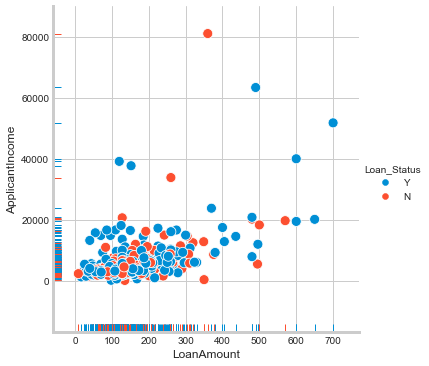

In [194]:

sns.relplot(data=df,x='LoanAmount',y='ApplicantIncome',hue='Loan_Status',s=100)
sns.rugplot(data=df,x='LoanAmount',y='ApplicantIncome',hue='Loan_Status',legend=False)

Remarks: Here we can see that most of the data points are converged near the range 0-20000 data for Applicant Income for loan amount between 0-400

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

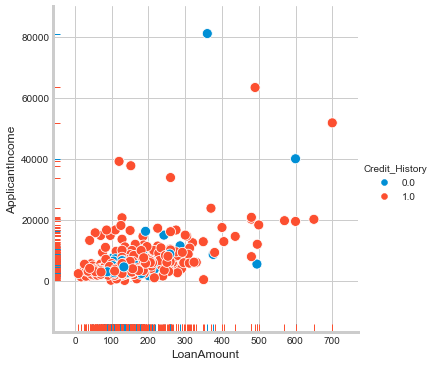

In [195]:

sns.relplot(data=df,x='LoanAmount',y='ApplicantIncome',hue='Credit_History',s=100)
sns.rugplot(data=df,x='LoanAmount',y='ApplicantIncome',hue='Credit_History',legend=False)

Remarks: Here we see that most of the data points have their credit history available and the values are converged between 0-20000 for applicant income and 0-400 for loan amount data.

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

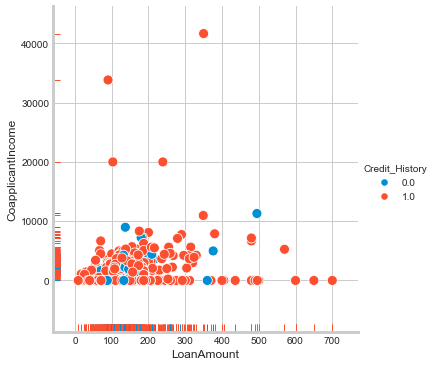

In [196]:

sns.relplot(data=df,x='LoanAmount',y='CoapplicantIncome',hue='Credit_History',s=100)
sns.rugplot(data=df,x='LoanAmount',y='CoapplicantIncome',hue='Credit_History',legend=False)

Remarks: Here we see that most of the data points have their credit history available and the values are converged between 0-20000 for applicant income and 0-400 for loan amount data.

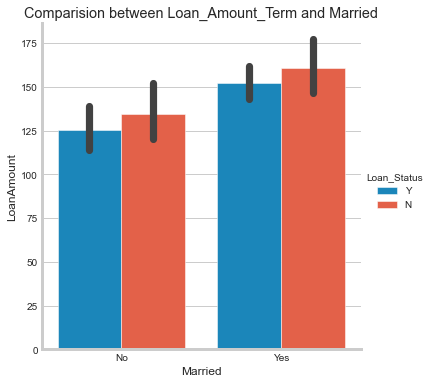

In [197]:
# Checking relation between LoanAmount and Married on the basis of target
sns.catplot(x="Married",y='LoanAmount',data=df,kind="bar",hue="Loan_Status")
plt.title("Comparision between Loan_Amount_Term and Married")
plt.show()

The applicants who got married and have average loan amount have more tendency of getting loan.

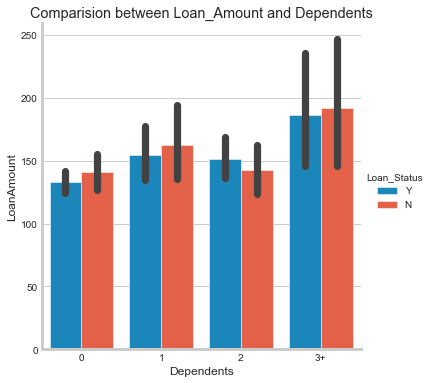

In [198]:
# Checking relation between LoanAmount and Dependents on the basis of target
sns.catplot(x="Dependents",y='LoanAmount',data=df,kind="bar",hue="Loan_Status")
plt.title("Comparision between Loan_Amount and Dependents")
plt.show()

The applicants who have more than 3 dependents with average loan amount have got thier loan approved.

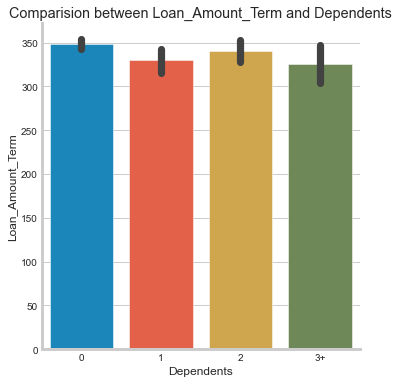

In [199]:
# Checking relation between LoanAmountTerm and Dependents on the basis of target
sns.catplot(x="Dependents",y='Loan_Amount_Term',data=df,kind="bar")
plt.title("Comparision between Loan_Amount_Term and Dependents")
plt.show()

The applicants 0 dependents have high Loan amount term followed by the dependent 2.

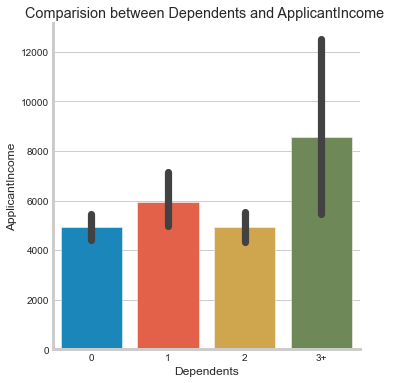

In [200]:
# Checking relation between income and Dependents on the basis of target
sns.catplot(x="Dependents",y='ApplicantIncome',data=df,kind="bar")
plt.title("Comparision between Dependents and ApplicantIncome ")
plt.show()

The applicants dependents more than 3 has high average income and dependents with 2 has less income

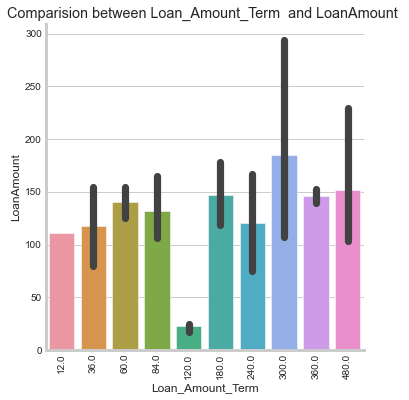

In [201]:
# Checking relation between Loan_Amount_Term and LoanAmount on the basis of target

sns.catplot(x="Loan_Amount_Term",y='LoanAmount',data=df,kind="bar")
plt.title("Comparision between Loan_Amount_Term  and LoanAmount ")
plt.xticks(rotation=90)
plt.show()

The loan amount term 300.0 is high with loan amount compared to others.



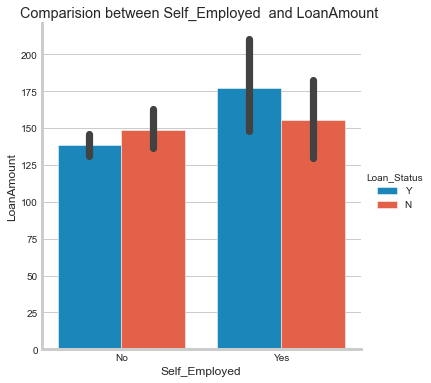

In [202]:
# Checking relation between Self_Employed and LoanAmount on the basis of target

sns.catplot(x="Self_Employed",y='LoanAmount',data=df,kind="bar",hue='Loan_Status')
plt.title("Comparision between Self_Employed  and LoanAmount ")
plt.show()

The average loan amount demanded by the self employed is more compare to the other also the loan approval for self employes applicants with avarage loan amount is high compare to the applicants who are not self employed

# Multivariate Analysis

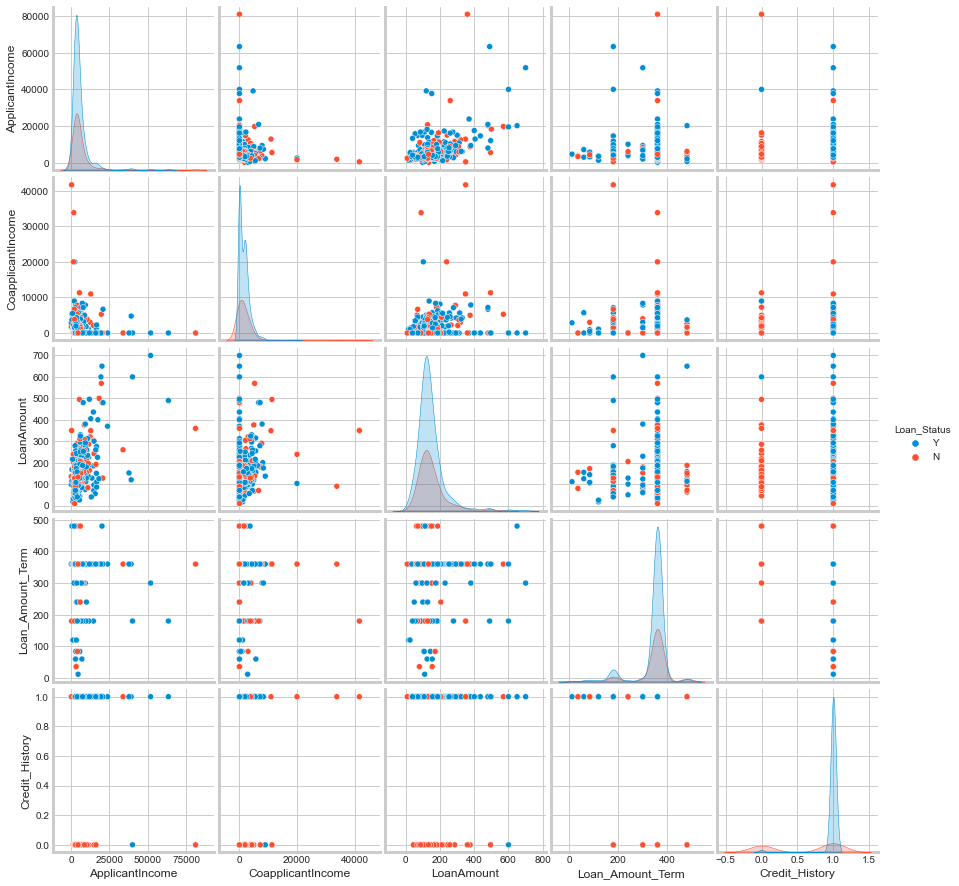

In [203]:
#checking the pairwise relation in the dataset

sns.pairplot(df,hue='Loan_Status')

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Loan_Status". Here we can observe the relation between the features and label.

We can observe the linear relationship between ApplicantIncome and LoanAmount, CoapplicantIncome and LoanAmount, ApplicantIncome and TotalIncome.

We can also observe the correlation in some columns also there are outliers present in some of the columns.

# Identifying the outliers

ApplicantIncome          AxesSubplot(0.08,0.657941;0.395455x0.222059)
CoapplicantIncome    AxesSubplot(0.554545,0.657941;0.395455x0.222059)
LoanAmount               AxesSubplot(0.08,0.391471;0.395455x0.222059)
Loan_Amount_Term     AxesSubplot(0.554545,0.391471;0.395455x0.222059)
Credit_History              AxesSubplot(0.08,0.125;0.395455x0.222059)
dtype: object

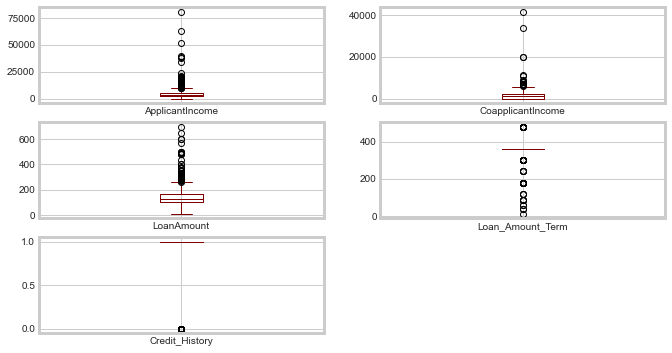

In [204]:
df.plot(kind='box',subplots=True,layout=(3,2),figsize=(10,6),color='maroon')

We can observe the outliers present in all the columns. But the columns Credit history has only two unique values so no need to remove outliers in this column. Let's remove outliers in remaining columns them using Zscore method.

# Removing outliers


# Zscore method


In [23]:
from scipy.stats import zscore

features=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
z=np.abs(zscore(features))
z

array([[0.07299082, 0.55448733, 0.21124125, 0.2732313 ],
       [0.13441195, 0.03873155, 0.21124125, 0.2732313 ],
       [0.39374734, 0.55448733, 0.94899647, 0.2732313 ],
       ...,
       [0.43717437, 0.47240418, 1.27616847, 0.2732313 ],
       [0.35706382, 0.55448733, 0.49081614, 0.2732313 ],
       [0.13441195, 0.55448733, 0.15174486, 0.2732313 ]])

In [24]:
thresshold=3
new_df=df[(z<3).all(axis=1)]
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Now we have removed the outliers, let's check the dataloss by creating new dataframe.

In [25]:
#checking the new and old dimension

print(new_df.shape)
print(df.shape)

(577, 12)
(614, 12)


# Data Loss %

In [26]:
# Checking the data loss after removing outliers

loss=(614-577)/614*100
loss

6.026058631921824

The data loss using zscore is 6.02%.

# Checking for Skewness


In [27]:
#checking the skewness

df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

The skewness is present in all the above coloumns. Here the columns Credit_History and Loan_Amount_Term have categorical data, so no need to remove skewness

# Removing Skewness using yeo-johnson method

In [31]:
#removing the skewness by yeo-johnson method

skew=['ApplicantIncome','CoapplicantIncome','LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')


In [32]:
new_df[skew]=scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


In [33]:
new_df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

So the skewness has been removed using yeo-johnson method

# After removing skewness let's check how the data has been distributed in each column.


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

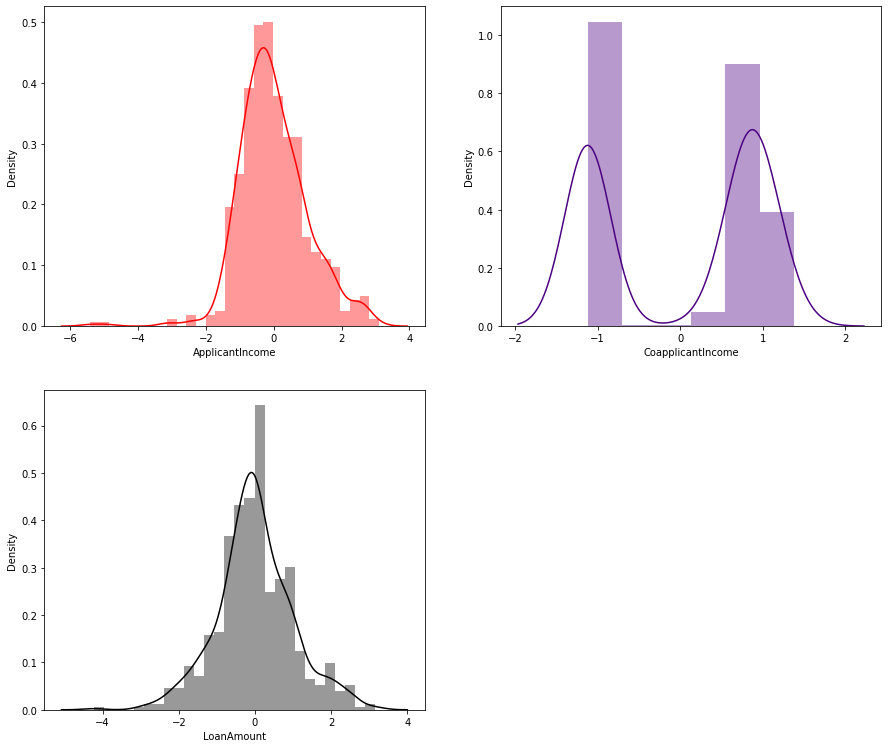

In [34]:
plt.figure(figsize=(15,20))
plt.subplot(3,2,1)
sns.distplot(new_df[skew].ApplicantIncome,kde=True,color='red')
plt.subplot(3,2,2)
sns.distplot(new_df[skew].CoapplicantIncome,kde=True,color='indigo')
plt.subplot(3,2,3)
sns.distplot(new_df[skew].LoanAmount,kde=True,color='black')

The data is almost normal also we have removed the skewness that we can notice in the above dist plot

# Encoding the categorical columns using Label Encoding

In [35]:
categorical_col=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

In [36]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(le.fit_transform)
new_df[categorical_col]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


The categorical columns have been converted into numerical columns by using label encoding.

# correlation

In [37]:
#checking correlation 

cor=new_df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map

<AxesSubplot:>

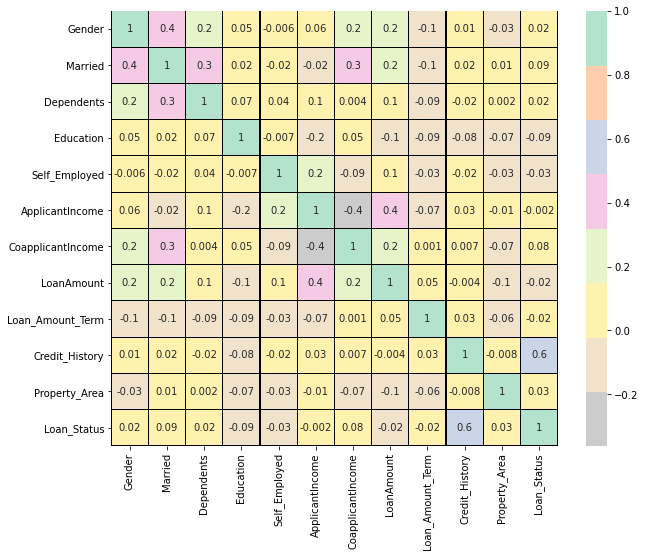

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr(),linewidths=.1,linecolor='black',fmt='.1g',vmax=1,annot=True,cmap='Pastel2_r')

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

-This heat mapcontains both positive and negative correlation.

The target column Loan_Status is highly positively correlated with the feature Credit_History.

The other features have very less correlation with the target column.

Also we can notice there is no multicollinearity issue in the features. Features have moderate level of correlation with each other.

ApplicantIncome and Gender is very less correlated with the target.

# Visualizing the correlation between label and features using bar plot

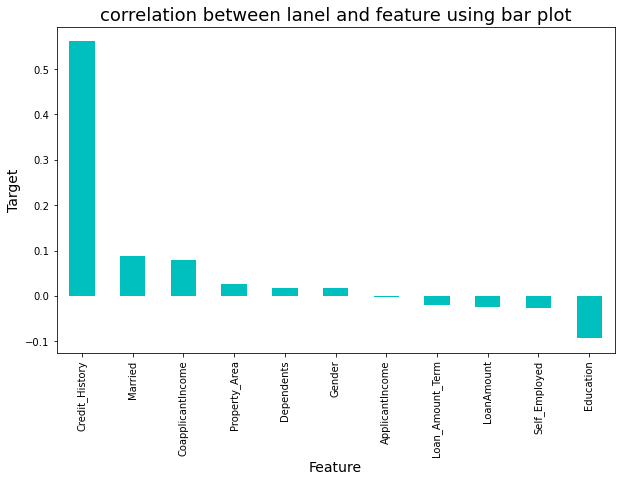

In [39]:
plt.figure(figsize=(10,6))
new_df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

Here the columns ApplicantIncome has very less correlation with the target column

# Checking for MultiColinearity

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,6.117335,Gender
1,3.942841,Married
2,1.777192,Dependents
3,1.349763,Education
4,1.197147,Self_Employed
5,1.754683,ApplicantIncome
6,1.584755,CoapplicantIncome
7,1.540851,LoanAmount
8,10.411435,Loan_Amount_Term
9,6.276583,Credit_History


MultiColinearity is not found

# Separating the features and label variables

In [40]:
x=new_df.drop('Loan_Status',axis=1)
y=new_df['Loan_Status']

We have separated both dependent and independent variables.

In [224]:
x.shape

(577, 11)

In [225]:
y.shape

(577,)

# Feature Scaling using Standard Scalarization

In [227]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.230853,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.230853,0.418513,1.227472


Now the data is scaled by using Standard Scalarization method.

# Oversmapling

In [229]:
#Balancing the Data

from imblearn.over_sampling import SMOTE

sm=SMOTE()
x,y=sm.fit_resample(x,y)


In [230]:
y.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

Now our data is balanced

In [232]:
#Dataframe after preprocessing and data cleaning

new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.681780,-1.122446,0.000771,360.0,1.0,2,1
1,1,1,1,0,0,0.234783,0.744117,0.000771,360.0,1.0,0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.437336,360.0,1.0,2,1
3,1,1,0,1,0,-0.791972,0.895786,-0.153545,360.0,1.0,2,1
4,1,0,0,0,0,0.728848,-1.122446,0.238260,360.0,1.0,2,1


We have done with the preprocessing and data cleaning. Now let's move to build the model.

# Modeling
Finding the best random state

In [234]:
maxAcc=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    dc=DecisionTreeClassifier()
    dc.fit(x_train,y_train)
    pred=dc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
print('Best accuracy is',maxAcc,'at random State',maxRs)

Best accuracy is 0.8451882845188284 at random State 96


The best accuracy is 84% on the Random state 96

# Creating trian_test_split


In [235]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=96)

We have splitted the dataset using best Random State.



# Models

# LogisticRegression

In [239]:
# Checking Accuracy for Logisticregression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7322175732217573
[[ 70  48]
 [ 16 105]]
              precision    recall  f1-score   support

           0       0.81      0.59      0.69       118
           1       0.69      0.87      0.77       121

    accuracy                           0.73       239
   macro avg       0.75      0.73      0.73       239
weighted avg       0.75      0.73      0.73       239



# Decision Tree Classifier

In [237]:
# Checking Accuracy for Decision Tree Classifier

dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
pred=dc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8410041841004184
[[ 95  23]
 [ 15 106]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       118
           1       0.82      0.88      0.85       121

    accuracy                           0.84       239
   macro avg       0.84      0.84      0.84       239
weighted avg       0.84      0.84      0.84       239



# RandomForestClassifier

In [238]:
# Checking Accuracy for Decision Tree Classifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8326359832635983
[[ 89  29]
 [ 11 110]]
              precision    recall  f1-score   support

           0       0.89      0.75      0.82       118
           1       0.79      0.91      0.85       121

    accuracy                           0.83       239
   macro avg       0.84      0.83      0.83       239
weighted avg       0.84      0.83      0.83       239



# SVC

In [242]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7656903765690377
[[ 76  42]
 [ 14 107]]
              precision    recall  f1-score   support

           0       0.84      0.64      0.73       118
           1       0.72      0.88      0.79       121

    accuracy                           0.77       239
   macro avg       0.78      0.76      0.76       239
weighted avg       0.78      0.77      0.76       239



# KNeighbors

In [243]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7573221757322176
[[84 34]
 [24 97]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       118
           1       0.74      0.80      0.77       121

    accuracy                           0.76       239
   macro avg       0.76      0.76      0.76       239
weighted avg       0.76      0.76      0.76       239



# GradientBoostingClassifier

In [248]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8075313807531381
[[ 79  39]
 [  7 114]]
              precision    recall  f1-score   support

           0       0.92      0.67      0.77       118
           1       0.75      0.94      0.83       121

    accuracy                           0.81       239
   macro avg       0.83      0.81      0.80       239
weighted avg       0.83      0.81      0.80       239



# Checking the Cross Validation Score

In [255]:
from sklearn.model_selection import cross_val_score



In [257]:
# cv score for Decision Tree Classifier
print(cross_val_score(dc,x,y,cv=5).mean())

0.7412814465408805


In [258]:
# cv score for Decision Tree Classifier
print(cross_val_score(rf,x,y,cv=5).mean())

0.8254559748427672


In [259]:
# cv score for Decision Tree Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.7362106918238994


In [260]:
# cv score for Decision Tree Classifier
print(cross_val_score(lr,x,y,cv=5).mean())

0.7072877358490566


In [261]:
# cv score for Decision Tree Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.7299292452830188


In [262]:
# cv score for Decision Tree Classifier
print(cross_val_score(gb,x,y,cv=5).mean())

0.8016352201257861


From the difference between the accuracy score and the cross validation score we can conclude that  GradientBoostingClassifier as our best fitting model whch is giving very less difference compare to other models.

# Hyper Parameter Tuning

In [263]:
from sklearn.model_selection import GridSearchCV

In [264]:

#creating the parameter list to pass in GrideSearchcv
parameters={'n_estimators':[10,100,200],
            'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8,9,10],
          }

gcv=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5,scoring="accuracy")
gcv.fit(x_train,y_train)
gcv.best_params_

{'max_depth': 7, 'max_features': 'log2', 'n_estimators': 100}

In [278]:

# Creating Final Model
loan=GradientBoostingClassifier(max_depth=7,max_features='log2',n_estimators=100)
loan.fit(x_train,y_train)
pred=loan.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred)*100)
print('confusion_matrix:''\n',confusion_matrix(y_test,pred))
print('classification_report:',classification_report(y_test,pred))

accuracy_score: 85.77405857740585
confusion_matrix:
 [[ 95  23]
 [ 11 110]]
classification_report:               precision    recall  f1-score   support

           0       0.90      0.81      0.85       118
           1       0.83      0.91      0.87       121

    accuracy                           0.86       239
   macro avg       0.86      0.86      0.86       239
weighted avg       0.86      0.86      0.86       239



The accuracy of best model increased after tuning and giving 85.77% which is very good

# Plotting ROC and compare AUC for all the models used

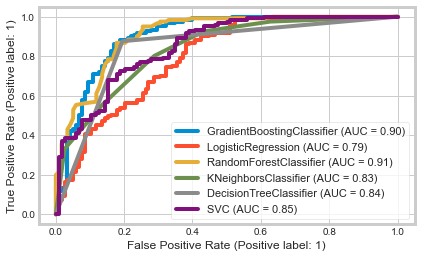

In [293]:
from sklearn.metrics import plot_roc_curve

disp=plot_roc_curve(gb,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')


This is the AUC-ROC curve for the models that we have used and is plotted False positive rate against True positive rate.

# Plotting ROC and Compare AUC for the best model GradientBoostingClassifier

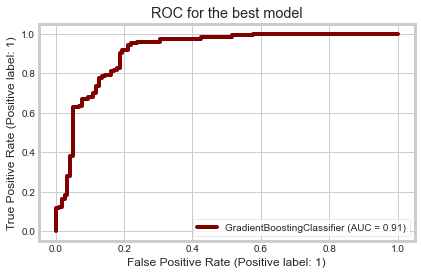

In [300]:
#checking AUC for the Best Model

plot_roc_curve(loan,x_test,y_test,color='maroon')
plt.title('ROC for the best model')
plt.show()

This is the ROC curve for the best model GradientBoostingClassifier and AUC for SVC is 91%.

# Saving The Model


In [304]:
import joblib
joblib.dump(loan,'Loan_Application_Status.pkl')

['Loan_Application_Status.pkl']

# Predicting the saved model

In [305]:
# Let's load the saved model and get the prediction
model=joblib.load('Loan_Application_Status.pkl')

#Prediction
prediction=model.predict(x_test)
prediction

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0])

These are the predicted loan approval status of the applicants.



In [306]:
#Checking the real values and predicted values

pred_data=pd.DataFrame()
pred_data['Real_values']=y_test
pred_data['Predicted_by_model']=pred
pred_data

,Real_values,Predicted_by_model
227,1,1
74,0,0
754,0,0
644,0,0
264,1,1
...,...,...
224,0,1
428,0,0
692,0,0
744,0,0


Conclusion:
    
1.In the given dataset, we were required to build a model that can predict the the loan_status like loan should be approved or not.

2.After some initial data analysis, we performed EDA to understand the effect of features on the target column and to understand other related important things

3.The data was imbalanced so to balance it, we used upsampling SMOTE method.

4.The dataset was very small. If the dataset was large, we could have learn more about the model and accuracy might have increased.

5.In the end, we build a ML model i.e.,GradientBoostingClassifier  that was able predict loan status with 85.77% accuracy.